# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Import Data

## Question 1.
Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
path = r"C:\Users\edriesberg\Google Drive\Instacart Basket Analysis"

In [3]:
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust.pkl'))

In [4]:
df.head(15)

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq,order_freq_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


## Question 2.
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.


In [5]:
df.columns

Index(['order_id', 'user_id', 'user_order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spend', 'spend_flag', 'order_freq', 'order_freq_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       '_merge'],
      dtype='object')

Based on the columns list above, there are 2 columns in particular that contain PII and cannot be included in the analysis.  `first_name` and `last_name`.  These columns contain identifiable information and therefore should not be used due to privacy concerns.

## Question 3.
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [6]:
# To verify correlation of spellings/capitalization for future sorting
df['state'].value_counts()

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [7]:
northeast = ['Maine','New Hampshire','Vermont','Massachusetts',
            'Rhode Island','Connecticut','New York','Pennsylvania',
            'New Jersey']

In [8]:
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio',
          'North Dakota','South Dakota','Nebraska','Kansas',
          'Minnesota','Iowa','Missouri']

In [9]:
south = ['Delaware','Maryland','District of Columbia','Virginia',
        'West Virginia','North Carolina','South Carolina',
        'Georgia','Florida','Kentucky','Tennessee','Mississippi',
        'Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [10]:
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado',
       'Arizona','New Mexico','Alaska','Washington','Oregon',
       'California','Hawaii']

In [11]:
states = []

for x in df['state']:
    if x in northeast:
        states.append('Northeast')
    elif x in midwest:
        states.append('Midwest')
    elif x in south:
        states.append('South')
    elif x in west:
        states.append('West')
        
# Purposefully using elif instead of else to verify all
# locations receive a region.

In [12]:
df['region'] = states

In [13]:
df['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [14]:
reg_cross = pd.crosstab(df['region'],df['spend_flag'],dropna = False)

In [15]:
reg_cross

spend_flag,High spender,Low spender
region,,
Midwest,155946,7441379
Northeast,108218,5614518
South,209637,10582248
West,160316,8132597


While there is some information, it's hard to determine if values are high or low due to differences in sample size. We need to normalize across regions.

In [16]:
reg_cross = pd.crosstab(df['region'],df['spend_flag'],
                        dropna = False,normalize = 'index')

In [17]:
reg_cross

spend_flag,High spender,Low spender
region,,
Midwest,0.020526,0.979474
Northeast,0.018910,0.981090
South,0.019425,0.980575
West,0.019332,0.980668


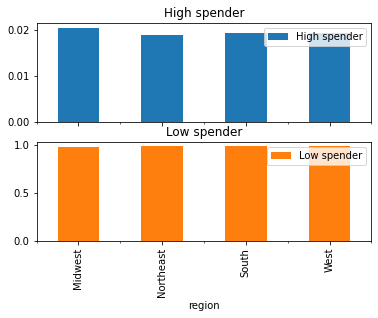

In [18]:
region_spend = reg_cross.plot(kind = 'bar',subplots = True)

This indicates that the midwest has the largest proportion of high spenders, and the northeast has the lowest proportion of high spenders.

## Question 4.
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [19]:
df['max_order'].value_counts()

99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
97      44949
98      44587
96      40453
2           6
1           5
Name: max_order, Length: 99, dtype: int64

The `max_order` column indicates how many total orders have been placed per `user_id`. All that needs to be done is to remove users that have a `max_order` number of < 5

In [20]:
low_freq_filt = df['max_order'] < 5

In [21]:
df.shape

(32404859, 32)

In [22]:
df_low = df[low_freq_filt]

In [23]:
df_low.shape

(1440295, 32)

In [24]:
df = df[~low_freq_filt]

In [25]:
df.shape

(30964564, 32)

The dataframe's added together have the same number of rows as the initial dataframe.  No information was lost.

In [26]:
df_low.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_freq_custs.pkl'))

## Question 5.
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [27]:
df.columns

Index(['order_id', 'user_id', 'user_order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spend', 'spend_flag', 'order_freq', 'order_freq_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       '_merge', 'region'],
      dtype='object')

According to https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx, Middle income is from `$40,500` to `$122,000`.  This will be used to define lower, middle, and higher income.

In [28]:
df.loc[(df['income']<40500), 'Income Level'] = 'Low income'

In [29]:
df.loc[(df['income']>=40500) & (df['income']<122000), 'Income Level'] = 'Middle income'

In [30]:
df.loc[(df['income']>=122000), 'Income Level'] = 'High income'

In [31]:
df['Income Level'].value_counts()

Middle income    20454402
High income       8824612
Low income        1685550
Name: Income Level, dtype: int64

To add parental status using dependents, we will use 18-29 as `young_parents`, 30-49 as `middle_age_parents`, and 50+ as `older_parents`. `no_dependents` will also be added for customers who either don't have kids, or have dependents that have moved out.

In [32]:
df.loc[(df['n_dependants'] == 0),'Parent Status'] = 'No dependants'

In [33]:
df.loc[(df['n_dependants'] != 0) & (df['age']>=18) & (df['age']<30),'Parent Status'] = 'Young parent'

In [34]:
df.loc[(df['n_dependants'] != 0) & (df['age']>=30) & (df['age']<50),'Parent Status'] = 'Middle-aged parent'

In [35]:
df.loc[(df['n_dependants'] != 0) & (df['age']>=50),'Parent Status'] = 'Older parent'

In [36]:
df['Parent Status'].value_counts(dropna = False)

Older parent          11550903
No dependants          7739681
Middle-aged parent     7303995
Young parent           4369985
Name: Parent Status, dtype: int64

In [37]:
df_profiles = df[['user_id','Parent Status','region','Income Level','prices','department_id']]

In [38]:
df_profiles.head(15)

,user_id,Parent Status,region,Income Level,prices,department_id
0,1,Middle-aged parent,South,Low income,9.0,7
1,1,Middle-aged parent,South,Low income,9.0,7
2,1,Middle-aged parent,South,Low income,9.0,7
3,1,Middle-aged parent,South,Low income,9.0,7
4,1,Middle-aged parent,South,Low income,9.0,7
5,1,Middle-aged parent,South,Low income,9.0,7
6,1,Middle-aged parent,South,Low income,9.0,7
7,1,Middle-aged parent,South,Low income,9.0,7
8,1,Middle-aged parent,South,Low income,9.0,7
9,1,Middle-aged parent,South,Low income,9.0,7


In [39]:
df_department = df_profiles.groupby('user_id').count()

In [40]:
df_department

,Parent Status,region,Income Level,prices,department_id
user_id,,,,,
1,59,59,59,59,59
10,143,143,143,143,143
100,27,27,27,27,27
1000,103,103,103,103,103
10000,1092,1092,1092,1092,1092
...,...,...,...,...,...
99994,164,164,164,164,164
99995,50,50,50,50,50
99996,128,128,128,128,128


In [41]:
df_parents = df_profiles.groupby('Parent Status').agg({'user_id':'nunique'})

In [42]:
df_parents

,user_id
Parent Status,
Middle-aged parent,38118
No dependants,40727
Older parent,61112
Young parent,22674


In [43]:
df_parent_income = df_profiles.groupby(['Parent Status','Income Level']).agg({'user_id':'nunique'})

In [44]:
df_parent_income

user_id
Parent Status      Income Level          
Middle-aged parent High income       7319
                   Low income        3399
                   Middle income    27400
No dependants      High income      10903
                   Low income        3314
                   Middle income    26510
Older parent       High income      25086
                   Low income        4053
                   Middle income    31973
Young parent       High income        193
                   Low income        2451
                   Middle income    20030

In [45]:
df_region_income = df_profiles.groupby(['region','Income Level']).agg({'user_id':'nunique'})

In [46]:
region_income_cross = pd.crosstab(df_profiles['Income Level'],df_profiles['region'],dropna = False, normalize = 'columns')

In [47]:
region_income_cross

region,Midwest,Northeast,South,West
Income Level,,,,
High income,0.289036,0.287255,0.28226,0.283276
Low income,0.053732,0.054610,0.05623,0.052622
Middle income,0.657232,0.658134,0.66151,0.664102


## Question 6.
Create an appropriate visualization to show the distribution of profiles.

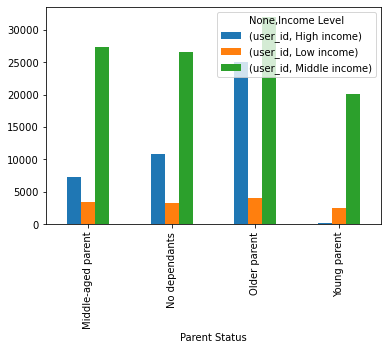

In [48]:
parent_income_plt = df_parent_income.unstack(1).plot(kind = 'bar')

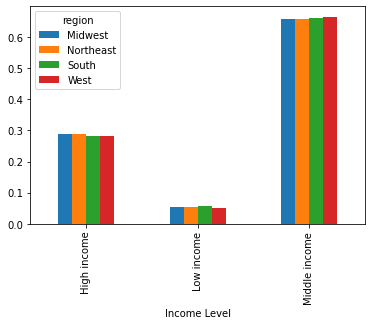

In [49]:
region_income_plt = region_income_cross.plot(kind = 'bar')

## Question 7.
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [50]:
expenditure = df.groupby('user_id').agg({'prices':['min','mean','max']})

In [51]:
frequency = df.groupby('user_id').agg({'days_since_prior_order':['min','mean','max']})

In [52]:
expenditure

prices                
           min      mean   max
user_id                       
1          1.0  6.367797  14.0
10         1.0  8.651049  24.2
100        2.3  9.859259  21.6
1000       1.2  8.407767  15.0
10000      1.2  8.045421  24.2
...        ...       ...   ...
99994      1.1  8.504878  14.3
99995      1.2  7.958000  21.3
99996      1.1  7.410938  15.0
99998      1.8  9.052381  21.1
99999      1.1  7.289970  24.2

[162631 rows x 3 columns]

In [53]:
frequency

days_since_prior_order                 
                           min       mean   max
user_id                                        
1                          0.0  18.542373  30.0
10                         0.0  20.020979  30.0
100                        0.0  24.370370  30.0
1000                       0.0   9.951456  30.0
10000                      0.0   4.854396  17.0
...                        ...        ...   ...
99994                      0.0  17.743902  30.0
99995                      0.0  14.800000  30.0
99996                      0.0  19.640625  30.0
99998                      0.0   8.000000  12.0
99999                      0.0   7.382979  24.0

[162631 rows x 3 columns]

## Question 8.
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [54]:
parent_region = pd.crosstab(df_profiles['Parent Status'],
                            df_profiles['region'],dropna=False,
                            normalize = 'columns')

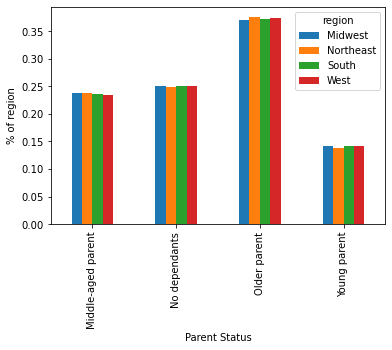

In [55]:
parent_region_plt = parent_region.plot(kind = 'bar', ylabel = '% of region')
parent_region_plt.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_parent_region.png'),bbox_inches = 'tight')

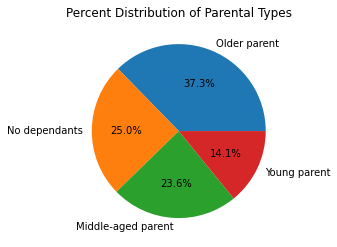

In [56]:
pie = df_profiles['Parent Status'].value_counts()
plt.title('Percent Distribution of Parental Types')
plt.pie(pie,labels = df_profiles['Parent Status'].value_counts().index,
       autopct='%1.1f%%')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_parent_dist.png'),bbox_inches = 'tight')

In [57]:
df_old = df_profiles[df_profiles['Parent Status']=='Older parent']

In [58]:
df_old

,user_id,Parent Status,region,Income Level,prices,department_id
15,19,Older parent,South,High income,9.0,7
16,19,Older parent,South,High income,9.0,7
17,19,Older parent,South,High income,9.0,7
23,52,Older parent,South,Middle income,9.0,7
24,52,Older parent,South,Middle income,9.0,7
...,...,...,...,...,...,...
32404837,198107,Older parent,West,High income,2.6,5
32404838,198107,Older parent,West,High income,2.6,5
32404840,205587,Older parent,West,Middle income,7.0,11
32404842,203389,Older parent,South,High income,8.8,17


In [59]:
departments = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))
departments

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


In [60]:
data_dict = departments.to_dict()
data_dict

{'department': {0: 'frozen',
  1: 'other',
  2: 'bakery',
  3: 'produce',
  4: 'alcohol',
  5: 'international',
  6: 'beverages',
  7: 'pets',
  8: 'dry goods pasta',
  9: 'bulk',
  10: 'personal care',
  11: 'meat seafood',
  12: 'pantry',
  13: 'breakfast',
  14: 'canned goods',
  15: 'dairy eggs',
  16: 'household',
  17: 'babies',
  18: 'snacks',
  19: 'deli',
  20: 'missing'}}

In [61]:
df_old['department'] = (df_old['department_id']-1).map(data_dict['department'])

<ipython-input-61-dfcf1c40af5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old['department'] = (df_old['department_id']-1).map(data_dict['department'])


In [62]:
df_old

,user_id,Parent Status,region,Income Level,prices,department_id,department
15,19,Older parent,South,High income,9.0,7,beverages
16,19,Older parent,South,High income,9.0,7,beverages
17,19,Older parent,South,High income,9.0,7,beverages
23,52,Older parent,South,Middle income,9.0,7,beverages
24,52,Older parent,South,Middle income,9.0,7,beverages
...,...,...,...,...,...,...,...
32404837,198107,Older parent,West,High income,2.6,5,alcohol
32404838,198107,Older parent,West,High income,2.6,5,alcohol
32404840,205587,Older parent,West,Middle income,7.0,11,personal care
32404842,203389,Older parent,South,High income,8.8,17,household


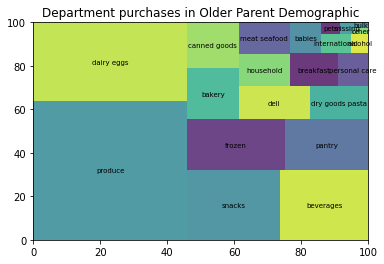

In [63]:
squarify.plot(sizes = df_old['department'].value_counts(),
             label = df_old['department'].value_counts().index,
             alpha = 0.8, text_kwargs={'fontsize':7})
plt.title('Department purchases in Older Parent Demographic')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','treemap_dept.png'),bbox_inches = 'tight')

## Question 9.
Produce suitable charts to illustrate your results and export them in your project folder.

In [64]:
parent_income_plt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_income.png'),bbox_inches = 'tight')

In [65]:
region_income_plt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_income.png'),bbox_inches = 'tight')

In [66]:
# parent_region_plt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_region.png'))

In [67]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data','final_dataset.pkl'))

In [68]:
reg_cross.to_clipboard()

In [69]:
parent_region.to_clipboard()